In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gpplot as gpp
import anchors
from poola import core as pool

import core_functions as fns

gpp.set_aesthetics(palette='Set2')


## Functions

In [42]:
#Control distributions
def control_dist_plot(chip_lfc, control_name, filename, gene_col = 'Gene Symbol', initial_id=None, res_id=None, paired_cols=None, col_sep = '_', figsize = (6,4)): 
    '''
    Inputs: 
    1. chip_lfc: annotated lfc data frame
    2. control_name: list containing strings identifying controls 
    3. initial_id: string identifying initial column names
    4. res_id: string identifying resistant column names
    5. filename: filename for saving figure
    6. figsize: default (6, 4)
    Outputs: kde plots of control distributions (initial, resistant)
    
    '''
    if not paired_cols:    
        sharex, lfc_pairs = pair_cols(chip_lfc, initial_id = initial_id, res_id = res_id, sep = col_sep)
    else:
        sharex, lfc_pairs = paired_cols
    controls = get_controls(chip_lfc, control_name)
    nrows = len(lfc_pairs)
    fig, ax = plt.subplots(nrows = nrows, ncols = 1, sharex = sharex, figsize = figsize)
    i = 0 # ax index if have to plot multiple axes
    for k,c in enumerate(lfc_pairs): # k=screen, c=ini, res pair 
        for l, c1 in enumerate(c): # l = ini or res, c1 = pop label 
            print(c1)
            title = c1 + ' (controls)'
#             pop_label = c1.split(' ')[0] #labels 'initial' or 'resistant'
            if initial_id in c1:
                pop_label = initial_id
            if res_id in c1:
                pop_label = res_id
            #Plot same screen on same subplot 
            if sharex: #if multiple axes, ax = ax[i]
                if len(controls.keys()) > 1:
                    for key, df in controls.items():
                        df[c1].plot(kind='kde',c=sns.color_palette('Set2')[l],label=key +' ('+pop_label+')', ax=ax[i], legend=True)
                else:
                    controls[c1].plot(kind='kde',c=sns.color_palette('Set2')[l],label=control_name[0] +' ('+pop_label+')', ax=ax[i], legend=True)
                ax[i].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
                sns.despine()
                t = ax[i].set_xlabel('Log-fold changes')
                t = ax[i].set_title(title)
            else: 
                controls[c1].plot(kind='kde',c=sns.color_palette('Set2')[l],label=control_name[0]+ ' ('+pop_label+')', ax=ax, legend=True)
                ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
                sns.despine()
                t = ax.set_xlabel('Log-fold changes')
                t = ax.set_title(title)
        i+=1 #switch to next subplot for next screen

        sns.despine()

## Data Summary

* Cell line: Calu-3
* Library: Calabrese Set A and B

In [12]:
# Reads from GEO Submission GSE175666 
reads_CalSetA = pd.read_excel('Data/GSE175666_Supplementary_Data_4_Calu-3_Act_Calabrese_Goujon.xlsx', sheet_name = 'Calu3_CalSetA_genomewide_reads')
reads_CalSetB = pd.read_excel('Data/GSE175666_Supplementary_Data_4_Calu-3_Act_Calabrese_Goujon.xlsx', sheet_name = 'Calu3_CalSetB_genomewide_reads')
reads_CalSetA

,Construct Barcode,pDNA,Calu-3 Calabrese A initial population,Calu-3 Calabrese A resistant population,Calu-3 Calabrese A initial population screen #2,Calu-3 Calabrese A resistant population screen #2
0,AAAAAAAAAAAGCACTCTGT,17,594,342,440,337
1,AAAAAAAAAAGCAGTGGGAG,20,957,534,850,324
2,AAAAAAAAAAGGTCATTCAG,24,1035,532,784,788
3,AAAAAAAAAATGTCAGAAGC,29,738,608,671,232
4,AAAAAAAAACAGGTCACCCA,29,348,73,514,390
...,...,...,...,...,...,...
56757,TTTGTTTGCTTCGAGGACGA,52,1757,557,1165,2305
56758,TTTTACCTTGTTCACATGGA,47,1406,1137,1513,564
56759,TTTTGACTCTAATCACCGGT,41,777,196,1200,456
56760,TTTTTAATACAAGGTAATCT,28,603,322,1647,524


In [28]:
# Gene Annotations
chip = pd.read_excel('Data/GSE175666_Supplementary_Data_4_Calu-3_Act_Calabrese_Goujon.xlsx', sheet_name = 'Calu3_Calabrese_guide_mapping')

# Merge annotations with reads
chip_reads_CalSetA = pd.merge(chip[['Construct Barcode', 'Gene Symbol']], reads_CalSetA, on = ['Construct Barcode'], how = 'right')
chip_reads_CalSetB = pd.merge(chip[['Construct Barcode', 'Gene Symbol']], reads_CalSetB, on = ['Construct Barcode'], how = 'right')

chip_reads_CalSetB


,Construct Barcode,Gene Symbol,pDNA,Calu-3 Calabrese B initial population screen #2,Calu-3 Calabrese B resistant population screen #2
0,AAAAAAAAAAACCTCTTGCT,SPTA1,217,904,514
1,AAAAAAAAAACTTCTTGTTG,C10orf90,186,596,183
2,AAAAAAAAAGAGTTCCTGTA,EMCN,292,1068,1088
3,AAAAAAAAAGCTAGCTTCCT,ONE_INTERGENIC_160,162,664,830
4,AAAAAAAAAGTGGTAGTAAC,CYP7A1,260,740,60
...,...,...,...,...,...
64398,TTTGTTTCAGCCAACCAGAC,LRRN3,333,1328,1060
64399,TTTGTTTCCCGCGGGCGCGC,ZNF524,353,1456,1080
64400,TTTGTTTCCTGATCCCAGGT,MISP,337,1686,972
64401,TTTGTTTCTGACTCACGGAG,PLEKHO1,309,1508,475


In [29]:
# Calculate lognorms
cols_CalSetA = chip_reads_CalSetA.columns[2:].to_list() #reads columns are 3rd onward in df
cols_CalSetB = chip_reads_CalSetB.columns[2:].to_list() #reads columns are 3rd onward in df
lognorms_CalSetA = fns.get_lognorm(chip_reads_CalSetA.dropna(), cols = cols_CalSetA)
lognorms_CalSetB = fns.get_lognorm(chip_reads_CalSetB.dropna(), cols = cols_CalSetB)
lognorms_CalSetA

,Construct Barcode,Gene Symbol,pDNA_lognorm,Calu-3 Calabrese A initial population_lognorm,Calu-3 Calabrese A resistant population_lognorm,Calu-3 Calabrese A initial population screen #2_lognorm,Calu-3 Calabrese A resistant population screen #2_lognorm
0,AAAAAAAAAAAGCACTCTGT,DNAAF4,2.799703,2.833720,2.577966,2.385828,2.715775
1,AAAAAAAAAAAGCACTCTGT,DNAAF4-CCPG1,2.799703,2.833720,2.577966,2.385828,2.715775
2,AAAAAAAAAAGCAGTGGGAG,VIT,3.002749,3.442899,3.131210,3.196089,2.667805
3,AAAAAAAAAAGGTCATTCAG,OR6K6,3.235468,3.545906,3.126415,3.092671,3.809719
4,AAAAAAAAAATGTCAGAAGC,KLK14,3.481832,3.106842,3.298260,2.896333,2.273268
...,...,...,...,...,...,...,...
64735,TTTTGACTCTAATCACCGGT,INACTIVE_4T_52,3.943104,3.172705,1.944432,3.646928,3.093582
64736,TTTTTAATACAAGGTAATCT,NO_SITE_146,3.435810,2.852392,2.505960,4.072133,3.272014
64737,TTTTTAATACAAGGTAATCT,INACTIVE_5T_53,3.435810,2.852392,2.505960,4.072133,3.272014
64738,TTTTTCTCACCCGATGAATC,NO_SITE_10,3.611694,3.586126,5.636215,3.675408,3.901924


## Quality Control
### Population Distributions

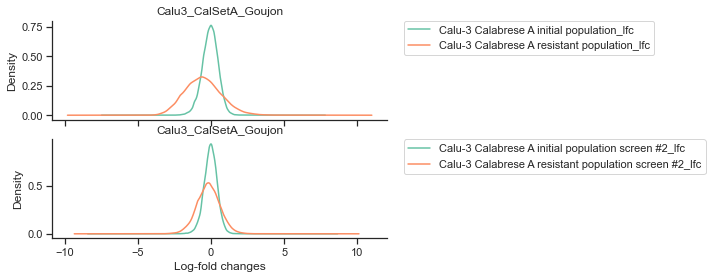

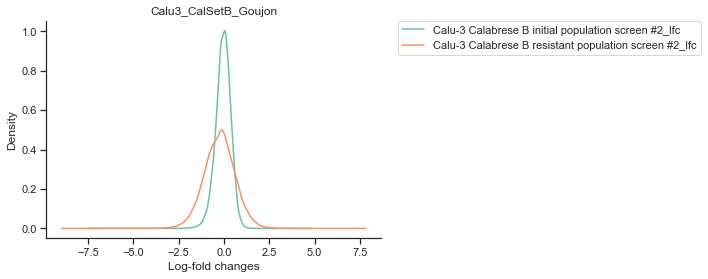

In [30]:
# Calculate log-fold change relative to pDNA
# Set A
target_cols_CalSetA = list(lognorms_CalSetA.columns[3:])
pDNA_lfc_CalSetA = fns.calculate_lfc(lognorms_CalSetA,target_cols_CalSetA)
paired_cols_SetA = (True, [['Calu-3 Calabrese A initial population_lfc',
       'Calu-3 Calabrese A resistant population_lfc'], ['Calu-3 Calabrese A initial population screen #2_lfc',
       'Calu-3 Calabrese A resistant population screen #2_lfc']])
#Plot population distributions of log-fold changes 
fns.lfc_dist_plot(pDNA_lfc_CalSetA, initial_id='initial', res_id='resistant', filename = 'Calu3_CalSetA_Goujon',
                 paired_cols=paired_cols_SetA)

# Set B
target_cols_CalSetB = list(lognorms_CalSetB.columns[3:])
pDNA_lfc_CalSetB = fns.calculate_lfc(lognorms_CalSetB,target_cols_CalSetB)
#Plot population distributions of log-fold changes 
fns.lfc_dist_plot(pDNA_lfc_CalSetB, initial_id='initial', res_id='resistant', filename = 'Calu3_CalSetB_Goujon')



### Control Distributions

Calu-3 Calabrese A initial population_lfc
Calu-3 Calabrese A resistant population_lfc
Calu-3 Calabrese A initial population screen #2_lfc
Calu-3 Calabrese A resistant population screen #2_lfc


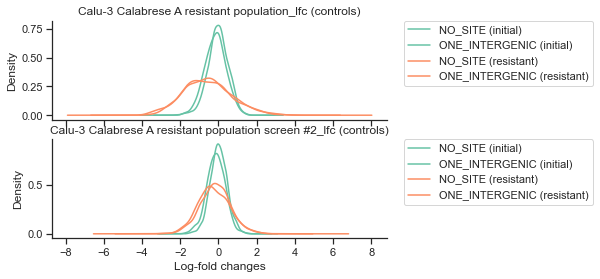

In [44]:
control_dist_plot(pDNA_lfc_CalSetA, initial_id='initial', res_id='resistant', control_name=['NO_SITE', 'ONE_INTERGENIC'], paired_cols=paired_cols_SetA, filename = 'Calu3_CalSetA_Goujon')




### ROC_AUC

Essential gene set: Hart et al., 2015 
<br>
Non-essential gene set: Hart et al., 2014 
<br>
AUC expected to be ~0.5 because no cutting occurred

Text(0, 0.5, 'True Positive Rate (essential)')

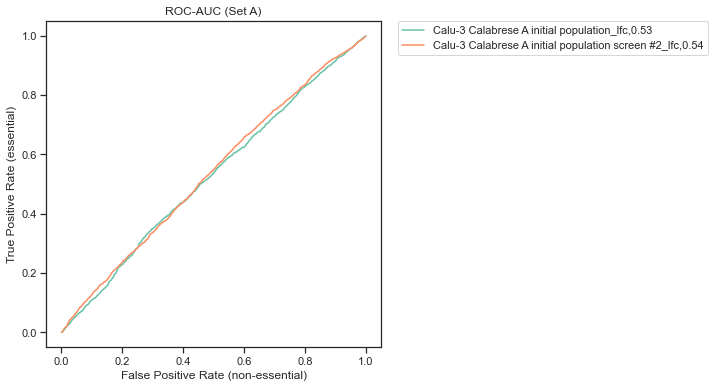

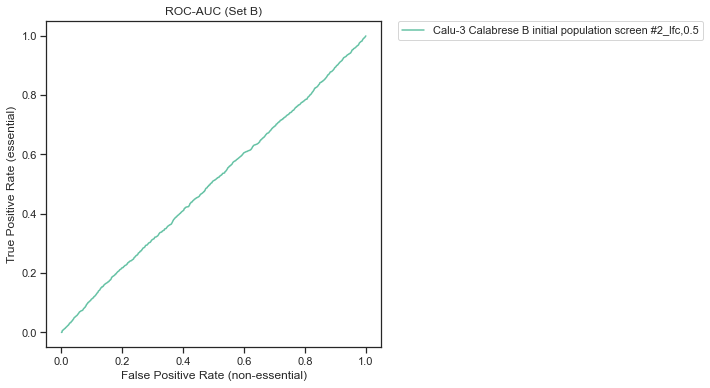

In [46]:
ess_genes, non_ess_genes = fns.get_gene_sets()
# Set A
initial_cols = [col for col in pDNA_lfc_CalSetA.columns if 'initial' in col]

tp_genes = ess_genes.loc[:, 'Gene Symbol'].to_list()

fp_genes = non_ess_genes.loc[:, 'Gene Symbol'].to_list()

initial_roc_dict = {}
intial_roc_auc_dict = {}
for col in initial_cols:
    roc_auc, roc_df = pool.get_roc_aucs(pDNA_lfc_CalSetA, tp_genes, fp_genes, gene_col = 'Gene Symbol', score_col=col)
    initial_roc_dict[col] = roc_df
    intial_roc_auc_dict[col] = roc_auc

fig,ax=plt.subplots(figsize=(6,6))

for key, df in initial_roc_dict.items():
    roc_auc = intial_roc_auc_dict[key]
    ax=sns.lineplot(data=df, x='fpr',y='tpr', ci=None, label = key+',' + str(round(roc_auc,2)))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('ROC-AUC (Set A)')
plt.xlabel('False Positive Rate (non-essential)')
plt.ylabel('True Positive Rate (essential)')

# Set B
initial_cols = [col for col in pDNA_lfc_CalSetB.columns if 'initial' in col]

tp_genes = ess_genes.loc[:, 'Gene Symbol'].to_list()

fp_genes = non_ess_genes.loc[:, 'Gene Symbol'].to_list()

initial_roc_dict = {}
intial_roc_auc_dict = {}
for col in initial_cols:
    roc_auc, roc_df = pool.get_roc_aucs(pDNA_lfc_CalSetB, tp_genes, fp_genes, gene_col = 'Gene Symbol', score_col=col)
    initial_roc_dict[col] = roc_df
    intial_roc_auc_dict[col] = roc_auc

fig,ax=plt.subplots(figsize=(6,6))

for key, df in initial_roc_dict.items():
    roc_auc = intial_roc_auc_dict[key]
    ax=sns.lineplot(data=df, x='fpr',y='tpr', ci=None, label = key+',' + str(round(roc_auc,2)))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('ROC-AUC (Set B)')
plt.xlabel('False Positive Rate (non-essential)')
plt.ylabel('True Positive Rate (essential)')


## Residual z-scores

In [48]:
lfc_df_CalSetA = pDNA_lfc_CalSetA.drop('Gene Symbol', axis = 1)
lfc_df_CalSetB = pDNA_lfc_CalSetB.drop('Gene Symbol', axis = 1)
lfc_df_CalSetA

,Construct Barcode,Calu-3 Calabrese A initial population_lfc,Calu-3 Calabrese A resistant population_lfc,Calu-3 Calabrese A initial population screen #2_lfc,Calu-3 Calabrese A resistant population screen #2_lfc
0,AAAAAAAAAAAGCACTCTGT,0.034017,-0.221737,-0.413875,-0.083928
1,AAAAAAAAAAAGCACTCTGT,0.034017,-0.221737,-0.413875,-0.083928
2,AAAAAAAAAAGCAGTGGGAG,0.440150,0.128461,0.193340,-0.334944
3,AAAAAAAAAAGGTCATTCAG,0.310438,-0.109053,-0.142797,0.574250
4,AAAAAAAAAATGTCAGAAGC,-0.374990,-0.183572,-0.585499,-1.208564
...,...,...,...,...,...
64735,TTTTGACTCTAATCACCGGT,-0.770399,-1.998672,-0.296176,-0.849522
64736,TTTTTAATACAAGGTAATCT,-0.583419,-0.929850,0.636323,-0.163797
64737,TTTTTAATACAAGGTAATCT,-0.583419,-0.929850,0.636323,-0.163797
64738,TTTTTCTCACCCGATGAATC,-0.025567,2.024522,0.063715,0.290230


In [52]:
residuals_lfcs_CalSetA, all_model_info, model_fit_plots = fns.run_guide_residuals(lfc_df_CalSetA, paired_cols=paired_cols_SetA[1])
residuals_lfcs_CalSetB, all_model_info, model_fit_plots = fns.run_guide_residuals(lfc_df_CalSetB, initial_id='initial', res_id='resistant')
residuals_lfcs_CalSetA



                                            modified  \
0        Calu-3 Calabrese A resistant population_lfc   
1  Calu-3 Calabrese A resistant population screen...   

                                         unperturbed  
0          Calu-3 Calabrese A initial population_lfc  
1  Calu-3 Calabrese A initial population screen #...  
                                            modified  \
0  Calu-3 Calabrese B resistant population screen...   

                                         unperturbed  
0  Calu-3 Calabrese B initial population screen #...  


,Construct Barcode,condition,residual,residual_z,unperturbed,lfc,lfc_reference
0,AAAAAAAAAAAGCACTCTGT,Calu-3 Calabrese A resistant population_lfc,0.233985,0.220480,Calu-3 Calabrese A initial population_lfc,-0.221737,0.034017
1,AAAAAAAAAAGCAGTGGGAG,Calu-3 Calabrese A resistant population_lfc,0.065076,0.061320,Calu-3 Calabrese A initial population_lfc,0.128461,0.440150
2,AAAAAAAAAAGGTCATTCAG,Calu-3 Calabrese A resistant population_lfc,-0.008789,-0.008282,Calu-3 Calabrese A initial population_lfc,-0.109053,0.310438
3,AAAAAAAAAATGTCAGAAGC,Calu-3 Calabrese A resistant population_lfc,0.746732,0.703633,Calu-3 Calabrese A initial population_lfc,-0.183572,-0.374990
4,AAAAAAAAACAGGTCACCCA,Calu-3 Calabrese A resistant population_lfc,-0.558009,-0.525803,Calu-3 Calabrese A initial population_lfc,-2.438448,-1.283090
...,...,...,...,...,...,...,...
113519,TTTGTTTGCTTCGAGGACGA,Calu-3 Calabrese A resistant population screen...,1.762635,2.592403,Calu-3 Calabrese A initial population screen #...,1.022856,-0.658333
113520,TTTTACCTTGTTCACATGGA,Calu-3 Calabrese A resistant population screen...,-0.461124,-0.678200,Calu-3 Calabrese A initial population screen #...,-0.760606,-0.170836
113521,TTTTGACTCTAATCACCGGT,Calu-3 Calabrese A resistant population screen...,-0.439215,-0.645978,Calu-3 Calabrese A initial population screen #...,-0.849522,-0.296176
113522,TTTTTAATACAAGGTAATCT,Calu-3 Calabrese A resistant population screen...,-0.590192,-0.868028,Calu-3 Calabrese A initial population screen #...,-0.163797,0.636323


In [55]:
# Set A 
guide_mapping_CalSetA = pool.group_pseudogenes(pDNA_lfc_CalSetA[['Construct Barcode', 'Gene Symbol']], pseudogene_size=3, gene_col='Gene Symbol', control_regex=['NO_SITE','ONE_INTERGENIC_SITE'])
# Set B
guide_mapping_CalSetB = pool.group_pseudogenes(pDNA_lfc_CalSetB[['Construct Barcode', 'Gene Symbol']], pseudogene_size=3, gene_col='Gene Symbol', control_regex=['NO_SITE','ONE_INTERGENIC_SITE'])

guide_mapping_CalSetA



,Construct Barcode,Gene Symbol
0,AAAAAAAAAAAGCACTCTGT,DNAAF4
1,AAAAAAAAAAAGCACTCTGT,DNAAF4-CCPG1
2,AAAAAAAAAAGCAGTGGGAG,VIT
3,AAAAAAAAAAGGTCATTCAG,OR6K6
4,AAAAAAAAAATGTCAGAAGC,KLK14
...,...,...
64735,TTTTGACTCTAATCACCGGT,INACTIVE_4T_52
64736,TTTTTAATACAAGGTAATCT,NO_SITE_146
64737,TTTTTAATACAAGGTAATCT,INACTIVE_5T_53
64738,TTTTTCTCACCCGATGAATC,NO_SITE_10


In [56]:
# Set A
CalSetA_gene_residuals = anchors.get_gene_residuals(residuals_lfcs_CalSetA.drop_duplicates(), guide_mapping_CalSetA)
# Set B
CalSetB_gene_residuals = anchors.get_gene_residuals(residuals_lfcs_CalSetB.drop_duplicates(), guide_mapping_CalSetB)
CalSetA_gene_residuals

,condition,Gene Symbol,guides,avg_lfc,avg_lfc_reference,residual_zscore,p_value,fdr_bh
0,Calu-3 Calabrese A resistant population screen...,A1BG,3,-0.011564,-0.066235,0.500316,0.616852,0.994011
1,Calu-3 Calabrese A resistant population screen...,A1BG-AS1,2,0.167211,-0.198287,1.021165,0.307176,0.994011
2,Calu-3 Calabrese A resistant population screen...,A1CF,3,-0.215928,0.189610,-0.603099,0.546443,0.994011
3,Calu-3 Calabrese A resistant population screen...,A2M,3,-0.002988,0.402324,-0.546570,0.584674,0.994011
4,Calu-3 Calabrese A resistant population screen...,A2ML1,3,-0.637288,-0.118283,-0.976523,0.328805,0.994011
...,...,...,...,...,...,...,...,...
43467,Calu-3 Calabrese A resistant population_lfc,ZYG11A,3,-0.581948,-0.491078,0.735938,0.461769,0.972291
43468,Calu-3 Calabrese A resistant population_lfc,ZYG11B,3,-1.691362,-0.048235,-1.886063,0.059287,0.941997
43469,Calu-3 Calabrese A resistant population_lfc,ZYX,3,-0.583421,0.292320,-0.729401,0.465756,0.972291
43470,Calu-3 Calabrese A resistant population_lfc,ZZEF1,3,-0.338368,-0.173941,0.579840,0.562023,0.982814


Average across resistant screens and apply guide filter

In [57]:
# Set A
CalSetA_gene_residual_sheet = fns.format_gene_residuals(CalSetA_gene_residuals, guide_min = 2, guide_max = 4, ascending=True)

CalSetA_guide_residual_sheet = pd.merge(guide_mapping_CalSetA, residuals_lfcs_CalSetA.drop_duplicates(), on = 'Construct Barcode', how = 'inner')
# Set B
CalSetB_gene_residual_sheet = fns.format_gene_residuals(CalSetB_gene_residuals, guide_min = 2, guide_max = 4, ascending=True)

CalSetB_guide_residual_sheet = pd.merge(guide_mapping_CalSetB, residuals_lfcs_CalSetB.drop_duplicates(), on = 'Construct Barcode', how = 'inner')

CalSetA_guide_residual_sheet



['Calu-3 Calabrese A resistant population_lfc', 'Calu-3 Calabrese A resistant population screen #2_lfc']
Calu-3 Calabrese A resistant population_lfc
Calu-3 Calabrese A resistant population screen #2_lfc
['Calu-3 Calabrese B resistant population screen #2_lfc']


,Construct Barcode,Gene Symbol,condition,residual,residual_z,unperturbed,lfc,lfc_reference
0,AAAAAAAAAAAGCACTCTGT,DNAAF4,Calu-3 Calabrese A resistant population_lfc,0.233985,0.220480,Calu-3 Calabrese A initial population_lfc,-0.221737,0.034017
1,AAAAAAAAAAAGCACTCTGT,DNAAF4,Calu-3 Calabrese A resistant population screen...,0.431977,0.635332,Calu-3 Calabrese A initial population screen #...,-0.083928,-0.413875
2,AAAAAAAAAAAGCACTCTGT,DNAAF4-CCPG1,Calu-3 Calabrese A resistant population_lfc,0.233985,0.220480,Calu-3 Calabrese A initial population_lfc,-0.221737,0.034017
3,AAAAAAAAAAAGCACTCTGT,DNAAF4-CCPG1,Calu-3 Calabrese A resistant population screen...,0.431977,0.635332,Calu-3 Calabrese A initial population screen #...,-0.083928,-0.413875
4,AAAAAAAAAAGCAGTGGGAG,VIT,Calu-3 Calabrese A resistant population_lfc,0.065076,0.061320,Calu-3 Calabrese A initial population_lfc,0.128461,0.440150
...,...,...,...,...,...,...,...,...
129475,TTTTTAATACAAGGTAATCT,INACTIVE_5T_53,Calu-3 Calabrese A resistant population screen...,-0.590192,-0.868028,Calu-3 Calabrese A initial population screen #...,-0.163797,0.636323
129476,TTTTTCTCACCCGATGAATC,NO_SITE_10,Calu-3 Calabrese A resistant population_lfc,2.544095,2.397260,Calu-3 Calabrese A initial population_lfc,2.024522,-0.025567
129477,TTTTTCTCACCCGATGAATC,NO_SITE_10,Calu-3 Calabrese A resistant population screen...,0.384810,0.565960,Calu-3 Calabrese A initial population screen #...,0.290230,0.063715
129478,TTTTTCTCACCCGATGAATC,INACTIVE_5T_54,Calu-3 Calabrese A resistant population_lfc,2.544095,2.397260,Calu-3 Calabrese A initial population_lfc,2.024522,-0.025567


In [14]:
gene_residual_sheet = fns.format_gene_residuals(CalSetA_B_gene_residuals, guide_min=2, guide_max=4, ascending=True)
gene_residual_sheet
guide_residual_sheet = pd.merge(CalSetA_B_chip, CalSetA_B_guide_residuals_lfcs, on = 'Construct Barcode', how = 'outer')

['Calu-3 Calabrese B resistant population screen #2_lfc', 'Calu-3 Calabrese A resistant population_lfc', 'Calu-3 Calabrese A resistant population screen #2_lfc']
Calu-3 Calabrese B resistant population screen #2_lfc
Calu-3 Calabrese A resistant population_lfc
Calu-3 Calabrese A resistant population screen #2_lfc
